# This notebook is for plotting the IRM box coils calibration 

units are voltage against mT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# importing deming regression/orthogonal regression
def orthoreg(xvals, yvals):
    i = 0
    xsum = 0
    ysum = 0
    n = len(xvals)
    for i in range(n):
        xsum = xsum + xvals[i]
        ysum = ysum + yvals[i]
    N = n*1.0
    xm = xsum/N
    ym = ysum/N
    
    sxx = 0
    sxy = 0
    syy = 0
    for i in range (n):
        sxx = sxx + (xvals[i]-xm) * (xvals[i] - xm)
        sxy = sxy + (xvals[i]-xm) * (yvals[i] - ym)
        syy = syy + (yvals[i]-ym) * (yvals[i] - ym)
    sxx = sxx/(N-1)
    sxy = sxy/(N-1)
    syy = syy/(N-1)
    
    m = syy - sxx + ((syy - sxx) * (syy - sxx) + 4 * sxy * sxy)**0.5
    m = m / (2 * sxy)
    b = ym - m * xm
    outlist = (m, b)
    return outlist

In [3]:
calibration_data = pd.read_csv('calibration_data.csv' ,header=0)
calibration_data['Coil_1'] = calibration_data['Coil_1']*100
calibration_data['Coil_2'] = calibration_data['Coil_2']*100
calibration_data

,Voltage,Coil_1,Coil_2
0,10,36.18,93.23
1,15,53.86,140.14
2,20,72.06,186.74
3,25,90.41,234.22
4,50,181.45,472.39
5,75,272.47,718.73
6,100,362.03,947.60
7,150,542.50,1423.60
8,200,723.40,1899.20
9,250,903.60,2378.50


In [4]:
coil_1_m, coil_1_b = orthoreg(calibration_data['Voltage'], calibration_data['Coil_1'])

In [5]:
coil_2_m, coil_2_b = orthoreg(calibration_data['Voltage'], calibration_data['Coil_2'])

In [6]:
def coil_1_field(V):
    # calcualtes the field generated by coil 1 given a voltage
    return round(coil_1_m*V + coil_1_b,3)

def what_volt(field, coil):
    #field in mT
    if coil == 1:
        return round((field-coil_1_b)/coil_1_m,3)
    if coil == 2:
        return round((field-coil_2_b)/coil_2_m,3)
def coil_2_field(V):
    # calcualtes the field generated by coil 1 given a voltage
    return round(coil_2_m*V + coil_2_b,3)

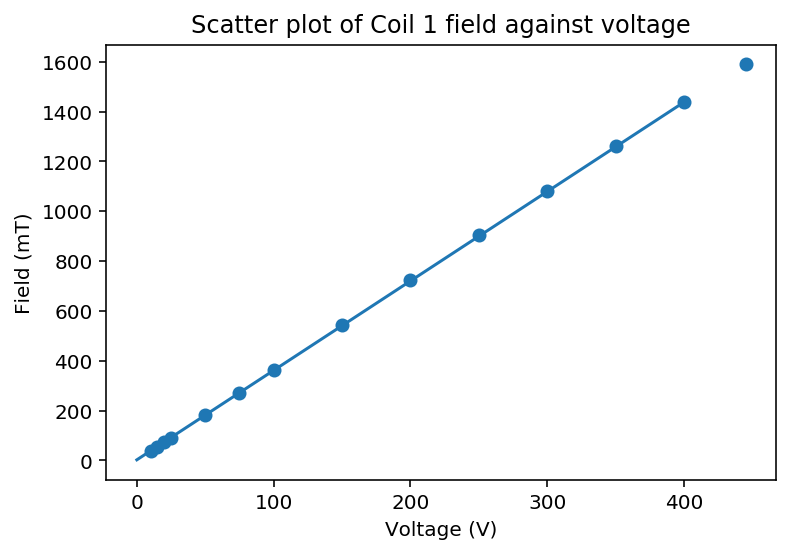

3.589 2.353


In [7]:
plt.scatter(calibration_data['Voltage'], calibration_data['Coil_1'], color='C0')
plt.plot([0,400], [coil_1_b, 400*coil_1_m+coil_1_b])
plt.title('Scatter plot of Coil 1 field against voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (mT)')
plt.show()
print(round(coil_1_m,3),  round(coil_1_b,3))

In [13]:
coil_1_field(2)

9.532

In [9]:
what_volt(1000, 1)

277.97

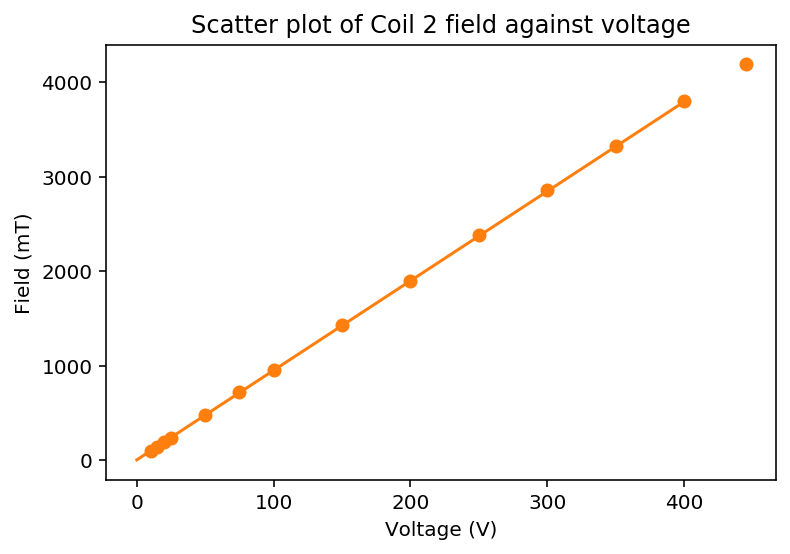

9.472 1.664


In [10]:
plt.scatter(calibration_data['Voltage'], calibration_data['Coil_2'], color = 'C1')
plt.plot([0,400], [coil_2_b, 400*coil_2_m+coil_2_b], color = 'C1')
plt.title('Scatter plot of Coil 2 field against voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Field (mT)')
plt.show()
print(round(coil_2_m,3),  round(coil_2_b,3))

In [11]:
coil_2_field(10)

96.385